In [8]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200
from matplotlib import gridspec
import numpy as np
import slab as s
reload(s)
from slab import SlabOut, CoolingOut
import plot_chem
reload(plot_chem)
import cooling_utils as cu
reload(cu)
from matplotlib.colors import LogNorm

In [9]:
Zd = 1. 

In [10]:
dir_out = "/Users/munangong/chemistry_Athena/PDR_cvode/" 
dir_cooling = "out_CR1e-13_cooling/"
slab = SlabOut(dir_out+dir_cooling, Zd=Zd) 
slab.ReadRates()
slab.ReadThermo()
cooling = CoolingOut(dir_out+dir_cooling, Zd=Zd) 
cooling.ReadThermo()

Set xC=1.60e-04, xO=3.20e-04.
Calculating E assuming CvCold and xHe=0.1 ...


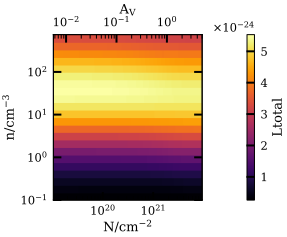

In [11]:
plot_chem.plot_abd(slab, "Ltotal", 
                   vmin=slab.abd["Ltotal"].min(), vmax=slab.abd["Ltotal"].max(), fig_size_factor=0.7)

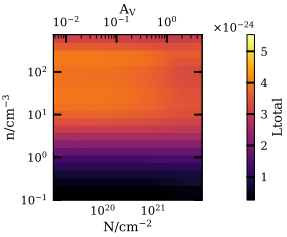

In [12]:
plot_chem.plot_abd(cooling, "Ltotal", 
                   vmin=slab.abd["Ltotal"].min(), vmax=slab.abd["Ltotal"].max(), fig_size_factor=0.7)

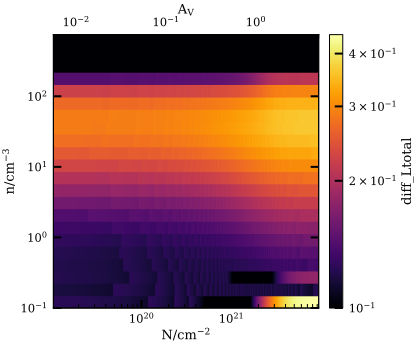

In [13]:
plot_chem.plot_abd(slab, "diff_Ltotal", plot_field=abs(cooling.abd["Ltotal"]/slab.abd["Ltotal"]-1), 
                   norm=LogNorm(), vmin=0.1)

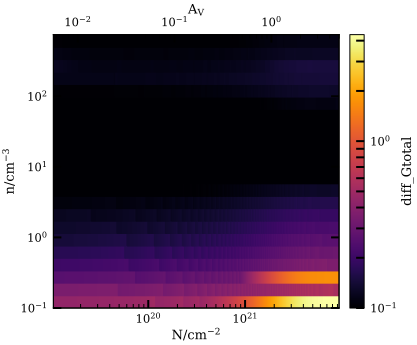

In [14]:
plot_chem.plot_abd(slab, "diff_Gtotal", plot_field=abs(cooling.abd["Gtotal"]/slab.abd["Gtotal"]-1), 
                   norm=LogNorm(), vmin=0.1)

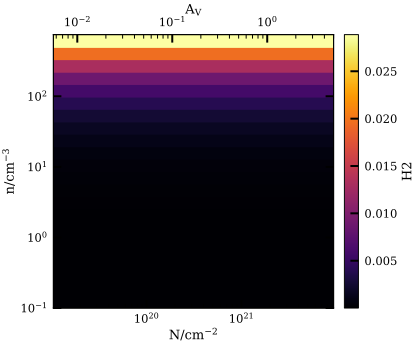

In [15]:
plot_chem.plot_abd(cooling, "H2")

In [216]:
G0=1.
xi_CR=1e-13
#fe = np.zeros(slab.nHM.shape)
fe_iter = np.zeros(slab.nHM.shape)
#fe_brent = np.zeros(slab.nHM.shape)
#fe_dekker = np.zeros(slab.nHM.shape)
niter = np.zeros(slab.nHM.shape)
#niter_brent = np.zeros(slab.nHM.shape)
#niter_dekker = np.zeros(slab.nHM.shape)
GPE = G0*np.exp(-1.87*slab.NHM*Zd/1.87e21)
GCI = G0*np.exp(-3.76*slab.NHM*Zd/1.87e21)
for i in xrange(slab.nHM.shape[0]):
    for j in xrange(slab.nHM.shape[1]):
        #fe[i, j] = cu.fe(slab.nHM[i, j], slab.abd["T"][i, j], GPE[i, j], GCI[i, j], kcr=xi_CR, Zd=Zd)
        fe_iter[i, j], niter[i, j] = cu.fe_iter(slab.nHM[i, j], slab.abd["T"][i, j], GPE[i, j], GCI[i, j],
                                                kcr=xi_CR, Zd=Zd, maxiter=20.)
        #fe_dekker[i, j], niter_dekker[i, j] = cu.fe_dekker(slab.nHM[i, j], slab.abd["T"][i, j], GPE[i, j], GCI[i, j],
        #                                        kcr=xi_CR, Zd=Zd, maxiter=20.)
        #fe_brent[i, j], niter_brent[i, j] = cu.fe_brent(slab.nHM[i, j], slab.abd["T"][i, j], GPE[i, j], GCI[i, j],
        #                                        kcr=xi_CR, Zd=Zd, maxiter=20.)

In [215]:
reload(cu)
cu.fe_iter(slab.nHM[0, 0], slab.abd["T"][0, 0], GPE[0, 0], GCI[0, 0],
                                                kcr=xi_CR, Zd=Zd, maxiter=10.)

(0.7138109207303128, 9)

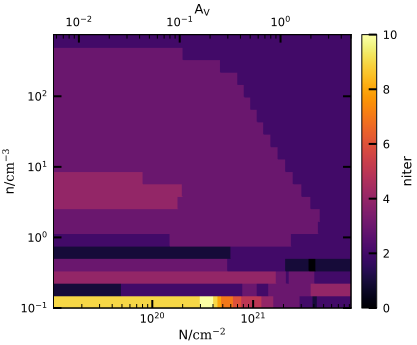

In [205]:
plot_chem.plot_abd(slab, "niter", plot_field=niter)

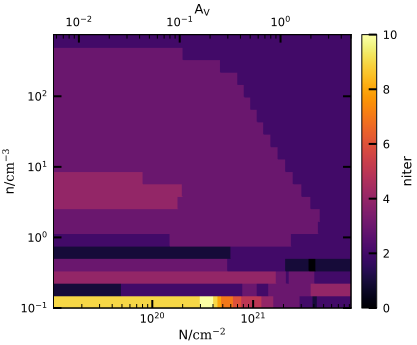

In [217]:
plot_chem.plot_abd(slab, "niter", plot_field=niter)

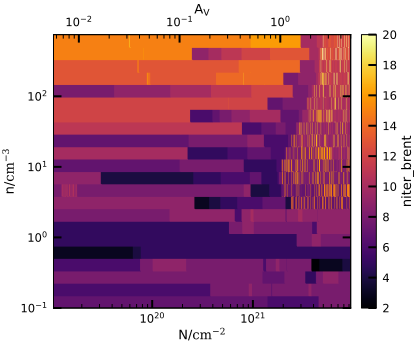

In [198]:
plot_chem.plot_abd(slab, "niter_brent", plot_field=niter_brent)

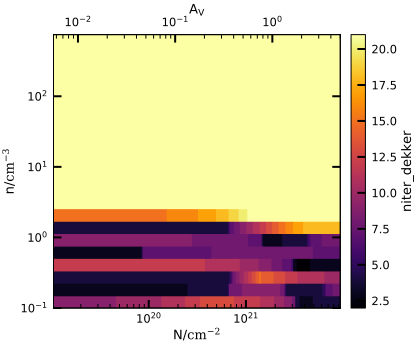

In [199]:
plot_chem.plot_abd(slab, "niter_dekker", plot_field=niter_dekker)

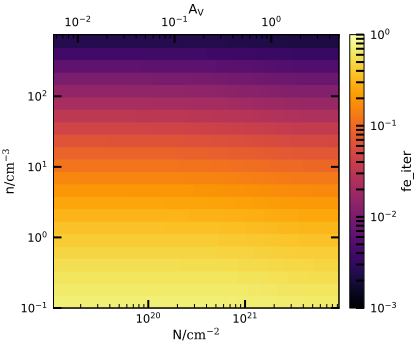

In [206]:
plot_chem.plot_abd(slab, "fe_iter", plot_field=fe_iter, norm=LogNorm(), vmin=1e-3, vmax=1)

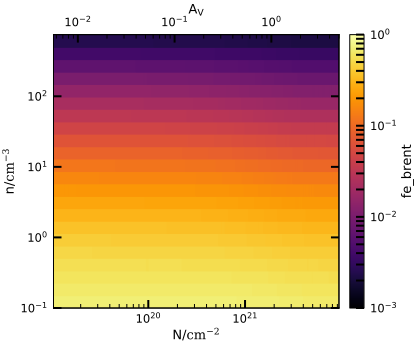

In [201]:
plot_chem.plot_abd(slab, "fe_brent", plot_field=fe_brent, norm=LogNorm(), vmin=1e-3, vmax=1)

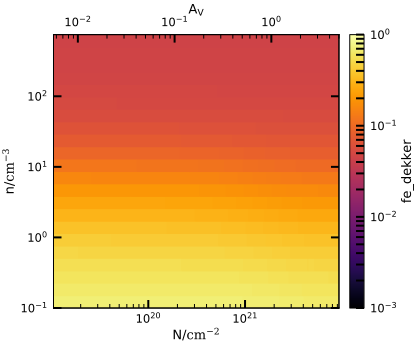

In [202]:
plot_chem.plot_abd(slab, "fe_dekker", plot_field=fe_dekker, norm=LogNorm(), vmin=1e-3, vmax=1)

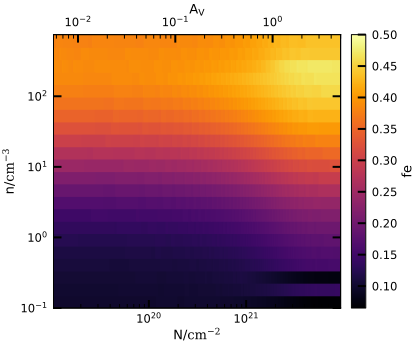

In [223]:
plot_chem.plot_abd(slab, "fe", plot_field=abs(cooling.abd["e"]/slab.abd["e"]-1), vmax=0.5)

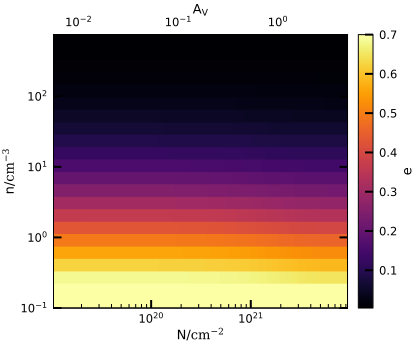

In [221]:
plot_chem.plot_abd(slab, "e", vmax=0.7)

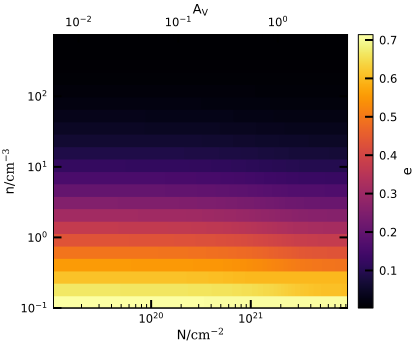

In [222]:
plot_chem.plot_abd(cooling, "e")

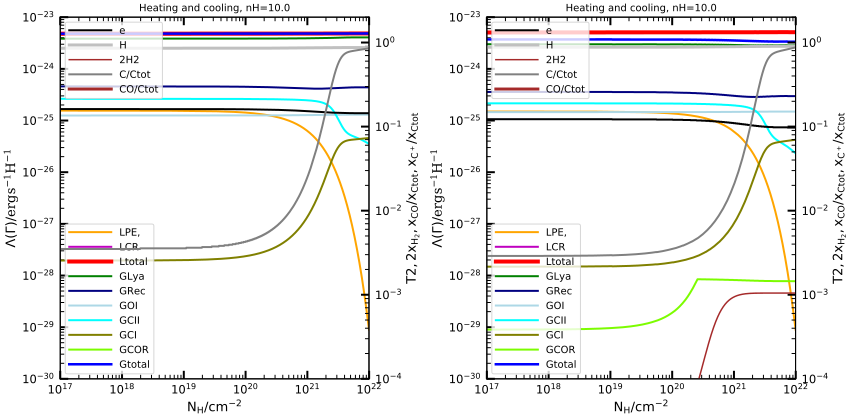

In [235]:
nH = 100
fig = plt.figure(figsize=[12, 6])
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
plot_chem.plot_thermo_nH(ax1, slab, nH, plot_unimportant=False)
plot_chem.plot_thermo_nH(ax2, cooling, nH)

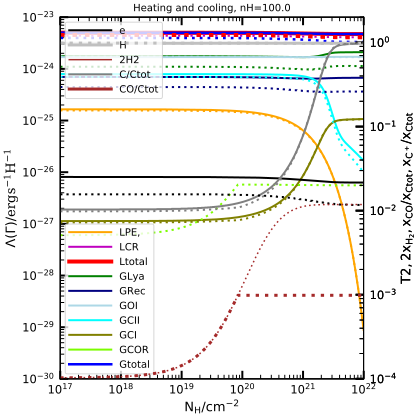

In [237]:
nH = 100
fig = plt.figure(figsize=[6, 6])
ax1 = fig.add_subplot(111)
plot_chem.plot_thermo_nH(ax1, slab, nH)
plot_chem.plot_thermo_nH(ax1, cooling, nH, linestyle=":", plot_legend=False)

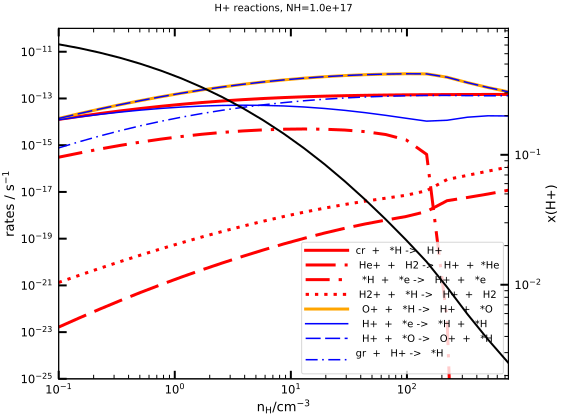

In [118]:
plot_chem.plot_rates_NH(slab, 1e17, "H+")

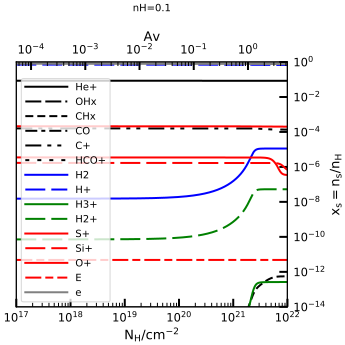

In [234]:
fig = plt.figure(figsize=[5, 5])
ax = fig.add_subplot(111)
plot_chem.plot_abd_all_nH(ax, slab, 0.1)

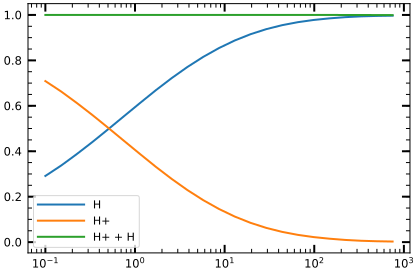

In [70]:
plt.plot(slab.nH, slab.GetAbd("H", NH=1e17), label="H")
plt.plot(slab.nH, slab.GetAbd("H+", NH=1e17), label="H+")
plt.plot(slab.nH, slab.GetAbd("H+", NH=1e17) + slab.GetAbd("H", NH=1e17), label="H+ + H")
plt.xscale("log")
plt.legend()